# Pymaceuticals Inc.
---

### Analysis

The bulk of the analysis we did applied to only a portion of the data set. However, the summary statistics we found showed us that the Capomulin drug regimen seemed to yield lower measures of central tendency regarding tumor volume in the mice it studied. It also had one of the lowest standard error/deviations of the study. It had more observed mice timepoints, and it was the natural choice for a more in depth explortation. Ramicane also had arguably better results in general, but they were so close their differences could possibly be explained by mice weight averages being different in their lab mice populations (when you notice the correlation between mice weight and tumor volume, it shows there is room to control the study more), for example. 

The line plot of one particular mouse showed how the tumor volumes receeded over the course of the administration of the drug. It should be noted that the drug did not seem to strictly decrease the tumor volume in the mouse l509 - there were some instances where tumor volume still increased. As with most data analysis, the answer always seems to lie behind even more analysis. Ultimately, these questions have so much complexity at their heart that it can be hard to isolate explicit causes without more rigorous controls, null hypothesis testing, etc. 

We noticed a pretty high correlation between weight and tumor volume as well. That makes sense, considering there are more cells in larger organisms. Cancer incidence in humans for example is higher in larger humans, although the parallel is not the same and there are several other factors behind that as well. But it's not surprising. 

One final note - the question to produce a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen was needlessly vague, and I believe the starter code solution assumed (or perhaps knew, because I think this is constructed data) that the weight of the mice stayed the same across the study. While that produced a cleaner scatterplot, because you don't end up overlaying points on top of each other, it seems a very naive and frankly illogical approach. I would always expect weight fluctuation in virtually any series of tests over a 45 day period. I advocate that the question ought to be requesting that we graph the weight of the mice under the drug of choice at each timepoint vs the average tumor volume for those mice, as opposed to a single weight measurement for said mice vs the average tumor volume. 

Also, there are several other possible derived statistics to calculate. Percentage change in tumor size over dosage period, for example. Measurements like these could reflect better on the quality of the drug regimen.

In [63]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_mouse_study_df = pd.merge(study_results, mouse_metadata, how='inner', on='Mouse ID', sort=False)

# Display the data table for preview
display(merged_mouse_study_df.head())

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [64]:
# Checking the number of mice.
total_mice = merged_mouse_study_df['Mouse ID'].unique()
total_mice = len(total_mice)

display(total_mice)

249

In [65]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

#.duplicated() returns a boolean series that marks a row as duplicated or not (according to a list of labels/columns - here we use Mouse ID and Timepoint because those are the only things we don't want to repeat). Using keep = false, we get all duplicates, not just the second occurence. We can use this as indices to find the subset of elements in the dataframe that correspond to duplicated entries, and then we can just iterate through that subset to find the duplicate ids
 
duplicated_mice = merged_mouse_study_df[merged_mouse_study_df.duplicated(['Mouse ID', 'Timepoint'], keep=False)]
duplicated_mice_list = []
for mouse_id in duplicated_mice['Mouse ID']:
    if (mouse_id not in duplicated_mice_list):
        duplicated_mice_list.append(mouse_id)

display(duplicated_mice_list)



['g989']

In [66]:
# Optional: Get all the data for the duplicate mouse ID. 

#similar to above results of duplicates, the result of (dataframe[column] <boolean expression>) yields a boolean series which can be used to index/return that subset from the dataframe. It seems this is the intended way to to grab rows from a dataframe

for mouse_id in duplicated_mice_list:
    display(merged_mouse_study_df[merged_mouse_study_df['Mouse ID'] == mouse_id])
    print(len(merged_mouse_study_df[merged_mouse_study_df['Mouse ID'] == mouse_id]))


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


13


In [67]:
#create a copy in case we want to reference this data frame later. Default parameter keep = True, which means we have a true new copy.
clean_merged_mouse_study_df = merged_mouse_study_df.copy()

In [82]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

#there's about a hundred ways to do this, the simple one is to just assign the variable for the dataframe to a subset of that dataframe

for mouse_id in duplicated_mice_list:
    clean_merged_mouse_study_df = clean_merged_mouse_study_df[clean_merged_mouse_study_df['Mouse ID'] != mouse_id]


#you can see that we have removed 13 rows, which corresponds to the size of the duplicated data
display(clean_merged_mouse_study_df.head())
display(merged_mouse_study_df.head())

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [69]:
# Checking the number of mice in the clean DataFrame.
cleaned_total_mice = clean_merged_mouse_study_df['Mouse ID'].unique()
cleaned_total_mice = len(cleaned_total_mice)

display(cleaned_total_mice)

248

## Summary Statistics

In [83]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
summary_statistics_df = pd.DataFrame()

drug_regimen_means = clean_merged_mouse_study_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
summary_statistics_df['Mean Tumor Volume (mm3)'] = drug_regimen_means

drug_regimen_medians = clean_merged_mouse_study_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
summary_statistics_df['Median Tumor Volume (mm3)'] = drug_regimen_medians

drug_regimen_variances = clean_merged_mouse_study_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
summary_statistics_df['Tumor Volume Variance (mm3)'] = drug_regimen_variances

drug_regimen_standard_deviations = clean_merged_mouse_study_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
summary_statistics_df['Tumor Volume Std. Deviation (mm3)'] = drug_regimen_standard_deviations

drug_regimen_standard_errors = clean_merged_mouse_study_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
summary_statistics_df['Tumor Volume Standard Error (mm3)'] = drug_regimen_standard_errors

summary_statistics_df

,Mean Tumor Volume (mm3),Median Tumor Volume (mm3),Tumor Volume Variance (mm3),Tumor Volume Std. Deviation (mm3),Tumor Volume Standard Error (mm3)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [84]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
aggregate_summary_statistics_df = clean_merged_mouse_study_df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']})

aggregate_summary_statistics_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<Axes: xlabel='Drug Regimen'>

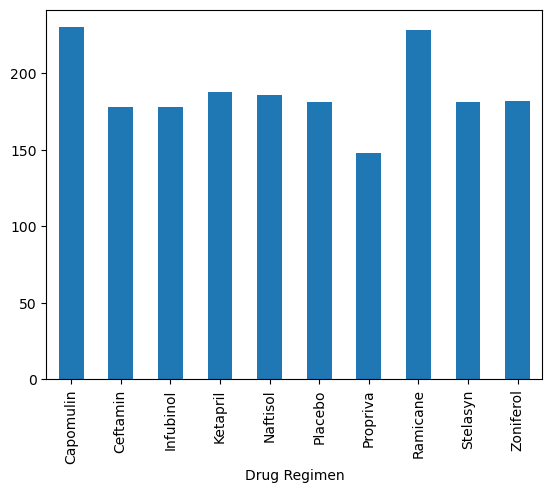

In [72]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.


#at this point all rows are unique, so just need row counts
regimen_counts = clean_merged_mouse_study_df.groupby('Drug Regimen')['Drug Regimen'].count()

#pretty handy to immediately create a plot from a series returned by a groupby()
regimen_counts.plot.bar()


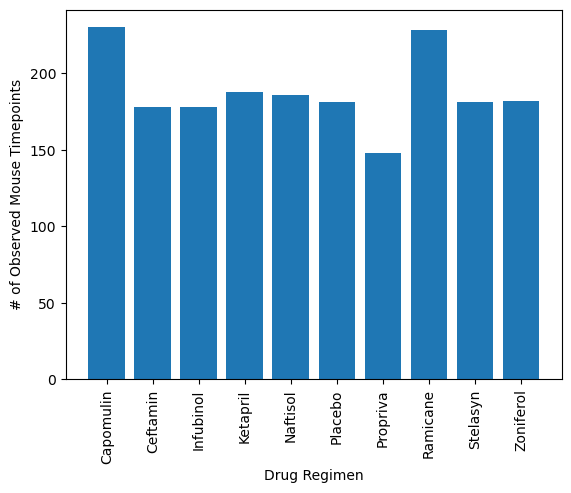

In [73]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.


regimens = regimen_counts.index.values.tolist()

plt.bar(regimens, regimen_counts)
plt.ylabel('# of Observed Mouse Timepoints')
plt.xlabel('Drug Regimen')
plt.xticks(rotation=90)
plt.show()

<Axes: ylabel='Sex Breakdown'>

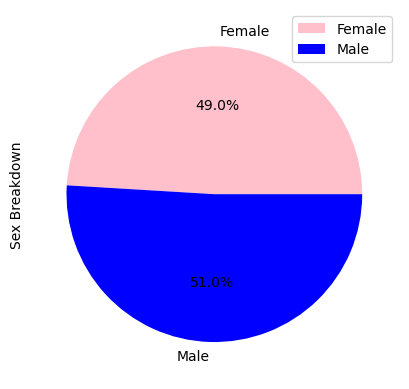

In [74]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

#I prefer size because it gives me group size immediately, which is the same as counts() if there is no NaN/null data anyhow. I don't have to specify a column again. 
sex_breakdown = clean_merged_mouse_study_df.groupby('Sex').size()
sex_breakdown

sex_breakdown.plot.pie(ylabel='Sex Breakdown', legend=True, autopct = '%1.1f%%', colors=['pink','blue'])

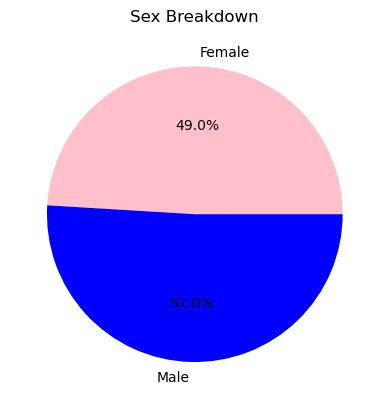

In [75]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

sex_breakdown_indices = sex_breakdown.index.values.tolist()
sex_breakdown_indices

plt.pie(sex_breakdown, labels=sex_breakdown_indices, autopct='%1.1f%%', colors=['pink', 'blue'])
plt.title('Sex Breakdown')
plt.show()


## Quartiles, Outliers and Boxplots

In [85]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin


# Start by getting the last (greatest) timepoint for each mouse
final_timepoints = clean_merged_mouse_study_df.groupby('Mouse ID')['Timepoint'].max()
final_timepoints

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
stats_cleaned_mice_study_df = pd.merge(clean_merged_mouse_study_df,final_timepoints, how='inner', on='Mouse ID')
stats_cleaned_mice_study_df.columns = ['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)', 'Max Timepoint']
stats_cleaned_mice_study_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Max Timepoint
0,b128,0,45.000000,0,Capomulin,Female,9,22,45
1,b128,5,45.651331,0,Capomulin,Female,9,22,45
2,b128,10,43.270852,0,Capomulin,Female,9,22,45
3,b128,15,43.784893,0,Capomulin,Female,9,22,45
4,b128,20,42.731552,0,Capomulin,Female,9,22,45


In [77]:
# Put treatments into a list for for loop (and later for plot labels)
specific_regimen_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']


# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in specific_regimen_list:    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    current_drug_rows = stats_cleaned_mice_study_df[(stats_cleaned_mice_study_df['Drug Regimen'] == drug) & (stats_cleaned_mice_study_df['Timepoint'] == stats_cleaned_mice_study_df['Max Timepoint'])]
    # display(current_drug_rows.head())
    current_drug_tumor_data = current_drug_rows['Tumor Volume (mm3)']
    # display(current_drug_tumor_data)

    # add subset 
    tumor_volume_data.append(current_drug_tumor_data)
    
    # Determine outliers using upper and lower bounds
    #grabbed this code from activity 2 of day 3 of section 5, Data Visualization
    quartiles = current_drug_tumor_data.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    temp_array = (current_drug_tumor_data).to_numpy()
    outliers = []
    for num in temp_array:
        if (num > upper_bound) or (num < lower_bound):
            outliers.append(num)
    print(f"Potential outliers for the drug {drug} are {outliers}")

Potential outliers for the drug Capomulin are []
Potential outliers for the drug Ramicane are []
Potential outliers for the drug Infubinol are [36.3213458]
Potential outliers for the drug Ceftamin are []


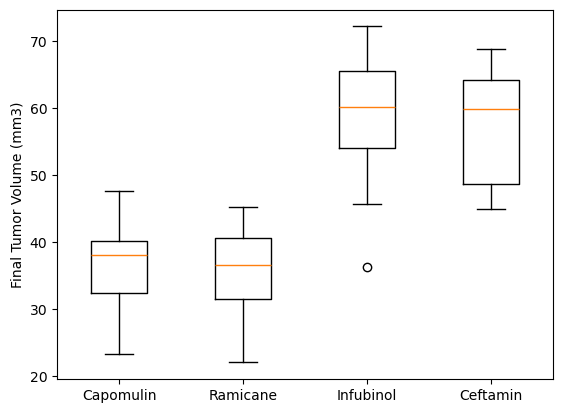

In [78]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

plt.boxplot(tumor_volume_data)

plt.ylabel('Final Tumor Volume (mm3)')
plt.xticks(ticks = range(1, len(specific_regimen_list)+1), labels=specific_regimen_list)
plt.show()

## Line and Scatter Plots

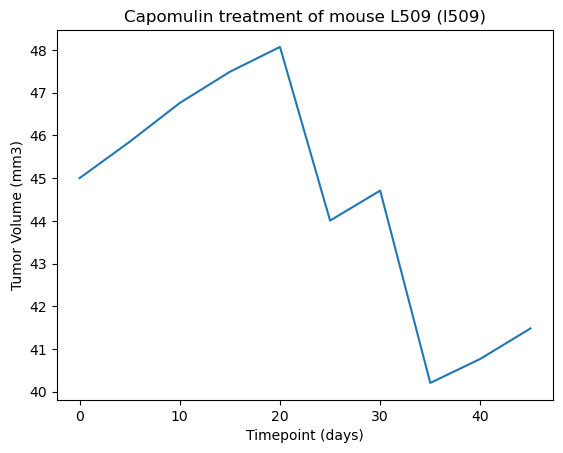

In [79]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

#using this because it was in the starter code, could have used any mouse id with capomulin treatment
specific_mouse_id = 'l509'

specific_mouse_tumor_data = stats_cleaned_mice_study_df[(stats_cleaned_mice_study_df['Mouse ID'] == specific_mouse_id)]['Tumor Volume (mm3)']

specific_mouse_timepoints = stats_cleaned_mice_study_df[(stats_cleaned_mice_study_df['Mouse ID'] == specific_mouse_id)]['Timepoint']
# specific_mouse_tumor_data
plt.plot(specific_mouse_timepoints, specific_mouse_tumor_data)
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Timepoint (days)')


plt.title('Capomulin treatment of mouse L509 (l509)')
plt.show()


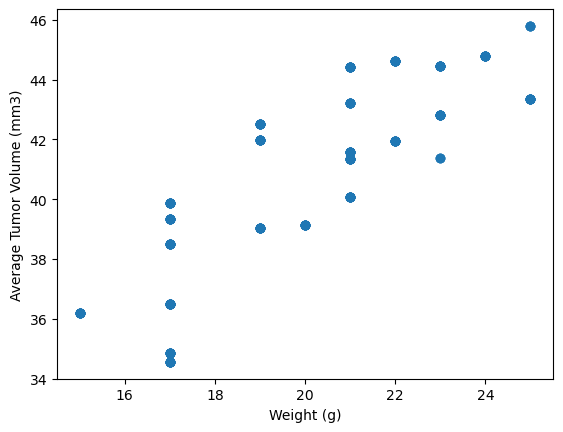

In [80]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

#is this for final tumor volume or in general? These prompts are vague
#we could find the mean tumor volume for the drug Capomulin
#we could find the mean tumor volume for all mice on the drug capomulin
#we cound find the final tumor volume for all the mice on the drug capomulin

#alternatively, we groupby Weight(g) applying mean() to tumor volume and plot
#I don't think this is what they want, as the graph in the starter code has several values for various weights

# scatter_data_df = the_drug_rows.groupby('Weight (g)')['Tumor Volume (mm3)'].mean()
# scatter_data_df

#This is a poorly written prompt that leaves me having to test several approaches to see which one matches the starter code output. 

#I think really we want to groupby mice id and find the mean of the Tumor Volume column, merge that to the dataframe, and take the subset where the drug is Capomulin. 

#The data looks like they assumed weight was constant for mice id, so they only had one value per mouse id, but that seems really naive for a data set like this. It probably is constructed that way, but I would absolutely expect weight fluctuations in living organisms over a course of 45 days. I'm sticking to my approach, although I could have done a groupby Mouse ID using .first() and then grab the weight/mean tumor volume data points. 


the_drug = 'Capomulin'

#first we find dataframe subset referring to capomulin mice only
the_drug_rows = stats_cleaned_mice_study_df[(stats_cleaned_mice_study_df['Drug Regimen'] == the_drug)]

#Then perform a groupby mice id, finding average volume
mice_on_the_drug_tumor_volume = the_drug_rows.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

#merge that back into the dataframe and clean up columns/names
scatter_plot_df = pd.merge(the_drug_rows, mice_on_the_drug_tumor_volume, how='inner', on='Mouse ID')

scatter_plot_df.columns = ['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)', 'Max Timepoint', 'Mean Tumor Volume for Mouse']

scatter_plot_df_clean = scatter_plot_df[['Mouse ID', 'Tumor Volume (mm3)',  'Drug Regimen',  'Weight (g)', 'Mean Tumor Volume for Mouse']]

scatter_plot_df_clean

weight_values = scatter_plot_df_clean['Weight (g)']
average_tumor_values = scatter_plot_df_clean['Mean Tumor Volume for Mouse']

plt.scatter(weight_values, average_tumor_values)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()



## Correlation and Regression

Correlation coefficient (r-value) for linear regression is 0.8343958614425954
r-squared is 0.6962164535925308


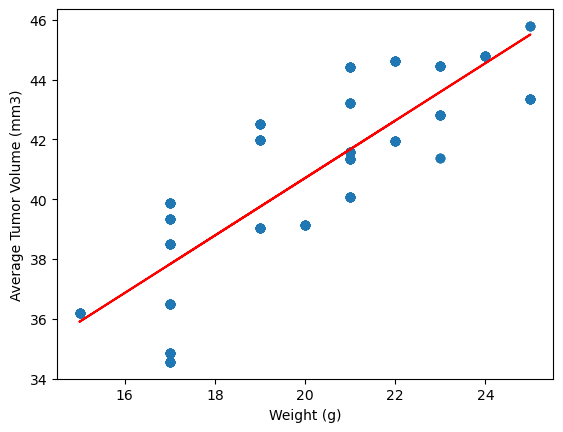

In [81]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

x_values = weight_values
y_values = average_tumor_values
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regression_values = x_values * slope + intercept

print(f"Correlation coefficient (r-value) for linear regression is {rvalue}")
print(f"r-squared is {ravlue**2}")

plt.scatter(x_values,y_values)
plt.plot(x_values,regression_values,"r-")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()